Data Extraction and Transformation:

In [2]:
import yaml
import pandas as pd
import os
from pathlib import Path

Function to Extract data from Yaml file

In [3]:
def load_yaml(file_path):
    with open(file_path, 'r') as file:
        return yaml.safe_load(file)

Function to Covert Yaml file to Dataframe

In [4]:
def yaml_to_df(data_directory):

    data_list = []

    for yaml_directory in Path(data_directory).iterdir():
        if not yaml_directory.is_dir():
            continue

        for filename in os.listdir(yaml_directory):
            if filename.endswith('.yaml') or filename.endswith('.yml'):
                file_path = os.path.join(yaml_directory, filename)
                yaml_data = load_yaml(file_path)

                if isinstance(yaml_data, dict):
                    yaml_data['filename'] = filename
                    data_list.append(yaml_data)
                elif isinstance(yaml_data, list):
                    for item in yaml_data:
                        if isinstance(item, dict):
                            item['filename'] = filename
                            data_list.append(item)
                        else:
                            data_list.append({'data': item, 'filename': filename})

    if data_list:
        dfYaml = pd.DataFrame(data_list) 
        dfYaml['date'] = pd.to_datetime(dfYaml['date'])
        dfYaml['stockyear'] = dfYaml['date'].dt.year
        dfYaml['stockmonth'] = dfYaml['date'].dt.month
        dfYaml['month'] = dfYaml['date'].dt.to_period('M')
        # dfYaml.sort_values(by=['Ticker','month'], ascending=True).to_csv(output_csv, index=False)
    else:
        dfYaml = pd.DataFrame([]) 
        print("No data found.")

    return dfYaml
        

Extracting the given Yaml files into Dataframe

In [5]:

data_directory = "D:/Personal/Training/Project-Stock-Analysis/StockData_YAML/"  #2023-10/

dfYaml=yaml_to_df(data_directory) 
print(dfYaml)



           Ticker    close                date    high      low    month  \
0            SBIN   602.95 2023-10-03 05:30:00   604.9   589.60  2023-10   
1      BAJFINANCE  7967.60 2023-10-03 05:30:00  7975.5  7755.00  2023-10   
2           TITAN  3196.25 2023-10-03 05:30:00  3212.5  3114.40  2023-10   
3             ITC   439.75 2023-10-03 05:30:00   442.9   439.25  2023-10   
4             TCS  3513.85 2023-10-03 05:30:00  3534.2  3480.10  2023-10   
...           ...      ...                 ...     ...      ...      ...   
14195    HINDALCO   652.10 2024-11-22 05:30:00   657.3   647.40  2024-11   
14196  HEROMOTOCO  4794.10 2024-11-22 05:30:00  4808.4  4742.00  2024-11   
14197    AXISBANK  1142.40 2024-11-22 05:30:00  1147.9  1127.55  2024-11   
14198    HDFCBANK  1745.60 2024-11-22 05:30:00  1754.3  1729.55  2024-11   
14199  BAJAJ-AUTO  9481.65 2024-11-22 05:30:00  9602.9  9444.10  2024-11   

          open    volume                  filename  stockyear  stockmonth  
0       596

Analyze both numeric and object series, as well as DataFrame column sets of mixed data types

In [6]:
dfYaml.info()
dfYaml.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14200 entries, 0 to 14199
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Ticker      14200 non-null  object        
 1   close       14200 non-null  float64       
 2   date        14200 non-null  datetime64[ns]
 3   high        14200 non-null  float64       
 4   low         14200 non-null  float64       
 5   month       14200 non-null  period[M]     
 6   open        14200 non-null  float64       
 7   volume      14200 non-null  int64         
 8   filename    14200 non-null  object        
 9   stockyear   14200 non-null  int32         
 10  stockmonth  14200 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(2), int64(1), object(2), period[M](1)
memory usage: 1.1+ MB


,close,date,high,low,open,volume,stockyear,stockmonth
count,14200.000000,14200,14200.000000,14200.000000,14200.000000,1.420000e+04,14200.000000,14200.000000
mean,2449.415380,2024-04-27 20:17:19.436619520,2476.495940,2422.374544,2450.982693,6.833475e+06,2023.785211,6.975352
min,116.600000,2023-10-03 05:30:00,118.550000,114.600000,114.600000,5.987000e+03,2023.000000,1.000000
25%,821.850000,2024-01-14 11:30:00,831.900000,814.500000,824.775000,9.636955e+05,2024.000000,4.000000
50%,1508.175000,2024-04-29 17:30:00,1523.875000,1493.315000,1510.000000,2.446882e+06,2024.000000,7.000000
75%,3101.762500,2024-08-09 23:30:00,3138.150000,3066.062500,3101.837500,8.592909e+06,2024.000000,10.000000
max,13495.600000,2024-11-22 05:30:00,13680.000000,13274.450000,13393.000000,2.680527e+08,2024.000000,12.000000
std,2573.791109,NaN,2601.744121,2545.346794,2575.276197,1.129303e+07,0.410690,3.485923


Function to Covert Dataframe into Multiple CSV files

In [92]:
def df_to_tickercsv(df,output_directory):
    # df = pd.read_csv(csvfile)
    os.makedirs(output_directory, exist_ok=True)

    for ticker, group in df.groupby('Ticker'):
        file_name = f"{ticker}.csv"
        file_path = os.path.join(output_directory, file_name)
        group.to_csv(file_path, index=False) 

Split the extracted Dataframe into Multiple CSV files based on Ticker

In [ ]:
output_directory = 'D:/Personal/Training/Project-Stock-Analysis/StockData_CSV/'
df_to_tickercsv(dfYaml,output_directory)

In [57]:
import glob

csv_files_path = output_directory + '*.csv'

csv_files = glob.glob(csv_files_path)

dataframes = []

for file in csv_files:
    df = pd.read_csv(file)
    dataframes.append(df)

merged_df = pd.concat(dataframes, ignore_index=True)

print(merged_df)

         Ticker    close                 date     high      low    month  \
0      ADANIENT  2387.25  2023-10-03 05:30:00  2424.90  2372.00  2023-10   
1      ADANIENT  2464.95  2023-10-04 05:30:00  2502.75  2392.25  2023-10   
2      ADANIENT  2466.35  2023-10-05 05:30:00  2486.50  2446.40  2023-10   
3      ADANIENT  2478.10  2023-10-06 05:30:00  2514.95  2466.05  2023-10   
4      ADANIENT  2442.60  2023-10-09 05:30:00  2459.70  2411.30  2023-10   
...         ...      ...                  ...      ...      ...      ...   
14195     WIPRO   566.70  2024-11-14 05:30:00   574.55   564.20  2024-11   
14196     WIPRO   552.85  2024-11-18 05:30:00   566.70   540.30  2024-11   
14197     WIPRO   562.00  2024-11-19 05:30:00   569.80   554.70  2024-11   
14198     WIPRO   557.15  2024-11-21 05:30:00   567.60   555.30  2024-11   
14199     WIPRO   571.65  2024-11-22 05:30:00   573.60   557.90  2024-11   

          open   volume                  filename  stockyear  stockmonth  
0      2418.

In [58]:
merged_df = merged_df.sort_values(by=['Ticker', 'date'])

yearly_returns = merged_df.groupby(['Ticker', 'stockyear']).agg(
    first_close=('close', 'first'),
    last_close=('close', 'last')
).reset_index()
yearly_returns['yearly_return'] = (yearly_returns['last_close'] - yearly_returns['first_close']) / yearly_returns['first_close']
merged_df = pd.merge(merged_df, yearly_returns[['Ticker', 'stockyear', 'yearly_return']], on=['Ticker', 'stockyear'], how='left')
merged_df['yearly_return'] = merged_df['yearly_return'].round(9)

monthly_returns = merged_df.groupby(['Ticker', 'stockyear', 'stockmonth']).agg(
    first_close=('close', 'first'),
    last_close=('close', 'last')
).reset_index()
monthly_returns['monthly_return'] = (monthly_returns['last_close'] - monthly_returns['first_close']) / monthly_returns['first_close']
merged_df = pd.merge(merged_df, monthly_returns[['Ticker', 'stockyear', 'stockmonth', 'monthly_return']], on=['Ticker', 'stockyear', 'stockmonth'], how='left')
merged_df['monthly_return'] = merged_df['monthly_return'].round(9)

merged_df['daily_return'] = merged_df.groupby('Ticker')['close'].pct_change()
merged_df['daily_return'] = merged_df['daily_return'].round(9)

merged_df['cumulative_return'] = (1 + merged_df['daily_return']).groupby(merged_df['Ticker']).cumprod() - 1
merged_df['cumulative_return'] = merged_df['cumulative_return'].round(9)

volatility = merged_df.groupby('Ticker')['daily_return'].std()
merged_df['volatility'] = merged_df['Ticker'].map(volatility)
merged_df['volatility'] = merged_df['volatility'].round(9)

# Save final merged data
# merged_df.to_csv('merged_data.csv', index=False)
# print("Merged data saved as 'merged_data.csv'.")



In [59]:
merged_df.info()
merged_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14200 entries, 0 to 14199
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ticker             14200 non-null  object 
 1   close              14200 non-null  float64
 2   date               14200 non-null  object 
 3   high               14200 non-null  float64
 4   low                14200 non-null  float64
 5   month              14200 non-null  object 
 6   open               14200 non-null  float64
 7   volume             14200 non-null  int64  
 8   filename           14200 non-null  object 
 9   stockyear          14200 non-null  int64  
 10  stockmonth         14200 non-null  int64  
 11  yearly_return      14200 non-null  float64
 12  monthly_return     14200 non-null  float64
 13  daily_return       14150 non-null  float64
 14  cumulative_return  14150 non-null  float64
 15  volatility         14200 non-null  float64
dtypes: float64(9), int64(3

,close,high,low,open,volume,stockyear,stockmonth,yearly_return,monthly_return,daily_return,cumulative_return,volatility
count,14200.000000,14200.000000,14200.000000,14200.000000,1.420000e+04,14200.000000,14200.000000,14200.000000,14200.000000,14150.000000,14150.000000,14200.000000
mean,2449.415380,2476.495940,2422.374544,2450.982693,6.833475e+06,2023.785211,6.975352,0.145552,0.016739,0.001025,0.259368,0.016580
std,2573.791109,2601.744121,2545.346794,2575.276197,1.129303e+07,0.410690,3.485923,0.239847,0.075022,0.017004,0.321199,0.003789
min,116.600000,118.550000,114.600000,114.600000,5.987000e+03,2023.000000,1.000000,-0.375676,-0.251188,-0.226068,-0.316253,0.011733
25%,821.850000,831.900000,814.500000,824.775000,9.636955e+05,2024.000000,4.000000,0.022139,-0.033954,-0.007555,0.046493,0.013712
50%,1508.175000,1523.875000,1493.315000,1510.000000,2.446882e+06,2024.000000,7.000000,0.111039,0.011755,0.000637,0.175515,0.015772
75%,3101.762500,3138.150000,3066.062500,3101.837500,8.592909e+06,2024.000000,10.000000,0.246470,0.064146,0.009211,0.366724,0.018671
max,13495.600000,13680.000000,13274.450000,13393.000000,2.680527e+08,2024.000000,12.000000,1.216049,0.268173,0.188633,2.999296,0.028601


In [64]:
merged_df.isnull().sum() 

Ticker                0
close                 0
date                  0
high                  0
low                   0
month                 0
open                  0
volume                0
filename              0
stockyear             0
stockmonth            0
yearly_return         0
monthly_return        0
daily_return         50
cumulative_return    50
volatility            0
dtype: int64

In [65]:
merged_df.fillna({'daily_return': 0, 'cumulative_return': 0}, inplace=True)
merged_df.isnull().sum() 

Ticker               0
close                0
date                 0
high                 0
low                  0
month                0
open                 0
volume               0
filename             0
stockyear            0
stockmonth           0
yearly_return        0
monthly_return       0
daily_return         0
cumulative_return    0
volatility           0
dtype: int64

Top 10 Green Stocks

In [107]:
top_10_green_stocks = merged_df.drop_duplicates(subset=['Ticker']).sort_values(by='yearly_return', ascending=False, ignore_index=True).head(10)
top_10_green_stocks.to_csv('top_10_green_stocks.csv',index=True)
print("Top 10 Green Stocks:")
print(top_10_green_stocks[['Ticker', 'yearly_return']])

Top 10 Green Stocks:
       Ticker  yearly_return
0       TRENT       0.483634
1  HEROMOTOCO       0.372712
2  BAJAJ-AUTO       0.354992
3         BEL       0.323276
4        BPCL       0.320190
5        NTPC       0.290008
6   COALINDIA       0.288112
7    HINDALCO       0.281071
8  ULTRACEMCO       0.264675
9  TATAMOTORS       0.257071


Top 10 Loss Stocks

In [108]:
top_10_red_stocks = merged_df.drop_duplicates(subset=['Ticker']).sort_values(by='yearly_return', ignore_index=True).head(10)
top_10_red_stocks.to_csv('top_10_red_stocks.csv',index=True)
print("\nTop 10 Loss Stocks:")
print(top_10_red_stocks[['Ticker', 'yearly_return']])


Top 10 Loss Stocks:
       Ticker  yearly_return
0  BAJFINANCE      -0.080306
1      MARUTI      -0.004310
2    HDFCLIFE       0.020756
3       TECHM       0.046415
4         ITC       0.050824
5       CIPLA       0.053686
6    AXISBANK       0.058835
7   ICICIBANK       0.059875
8     DRREDDY       0.061556
9        SBIN       0.064848


**Market Summary**

In [68]:
green_stocks_count = merged_df[merged_df['yearly_return'] > 0]['Ticker'].nunique()
red_stocks_count = merged_df[merged_df['yearly_return'] < 0]['Ticker'].nunique()
avg_price = merged_df['close'].mean()
avg_volume = merged_df['volume'].mean()

print(f"Number of Green Stocks: {green_stocks_count}")
print(f"Number of Red Stocks: {red_stocks_count}")
print(f"Average Price Across All Stocks: {avg_price:.2f}")
print(f"Average Volume Across All Stocks: {avg_volume:.2f}")


Number of Green Stocks: 49
Number of Red Stocks: 13
Average Price Across All Stocks: 2449.42
Average Volume Across All Stocks: 6833474.65


**Volatility Analysis**

**Top 10 Most Volatile Stocks**

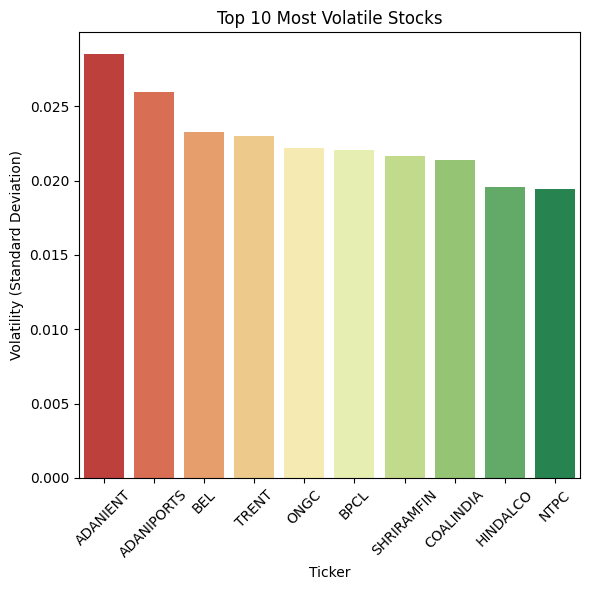

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

volatility = merged_df.groupby('Ticker')['daily_return'].std()

top_10_volatility = volatility.sort_values(ascending=False).head(10)

plt.figure(figsize=(6, 6))
sns.barplot(x=top_10_volatility.index, y=top_10_volatility.values, hue=top_10_volatility.index, palette='RdYlGn', legend=False)
plt.title('Top 10 Most Volatile Stocks')
plt.xlabel('Ticker')
plt.ylabel('Volatility (Standard Deviation)')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

**Cumulative Return Over Time**

**Cumulative Return for Top 5 Performing Stocks**

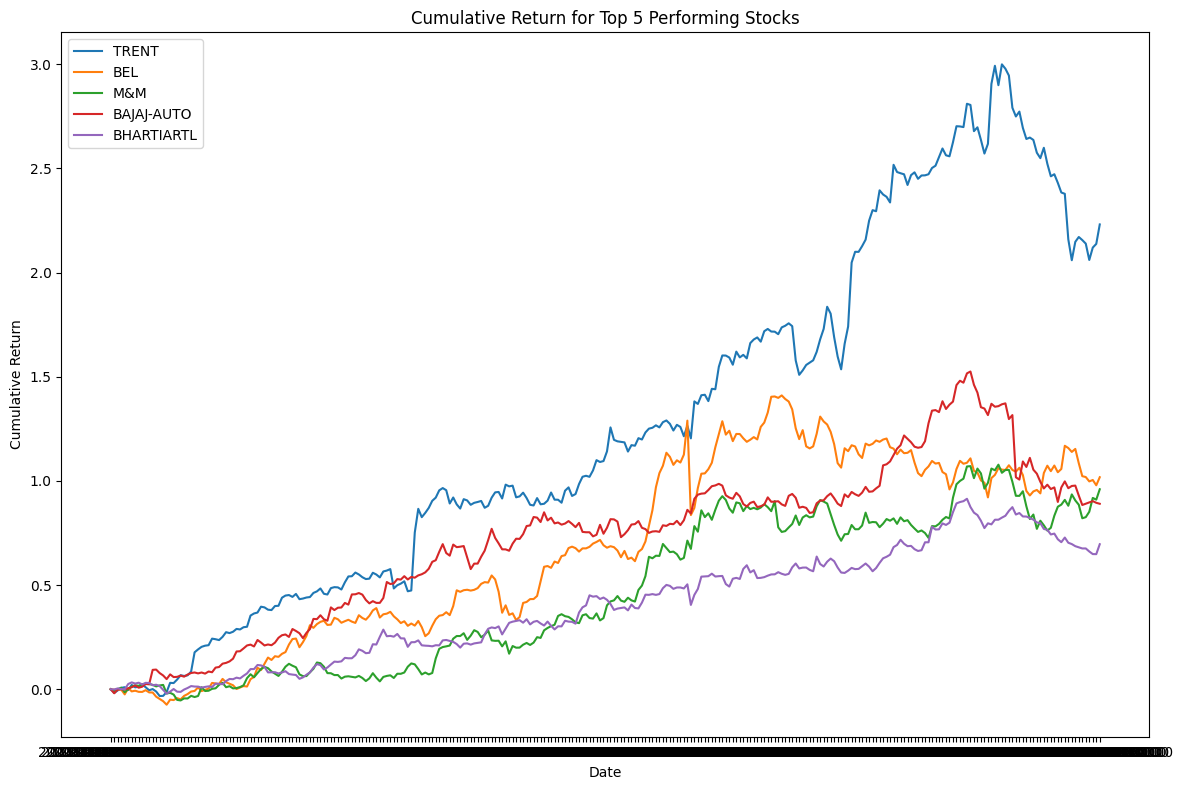

In [109]:
top_5_CRstocks = merged_df.groupby('Ticker')['cumulative_return'].last().nlargest(5).index

plt.figure(figsize=(12, 8))
for ticker in top_5_CRstocks:
    stock_data = merged_df[merged_df['Ticker'] == ticker]
    sns.lineplot(data=stock_data, x='date', y='cumulative_return', label=ticker)

plt.title('Cumulative Return for Top 5 Performing Stocks')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.tight_layout() 
plt.show()

**Sector-wise Performance**

Merge Sector data to Stock data

In [ ]:
sector_data = pd.read_csv('Sector_data.csv')

sector_data["Ticker"] = sector_data["Symbol"].str.split(": ").str[1]
sector_data = sector_data[["Ticker","Company","Sector"]]

Sec_merged_df = merged_df.merge(sector_data, on="Ticker", how="left")
Sec_merged_df.to_csv('Sector_Stock_data.csv', index=False) 

In [97]:
Sec_merged_df.isnull().sum()

Ticker               0
close                0
date                 0
high                 0
low                  0
month                0
open                 0
volume               0
filename             0
stockyear            0
stockmonth           0
yearly_return        0
monthly_return       0
daily_return         0
cumulative_return    0
volatility           0
Company              0
Sector               0
dtype: int64

**Average Yearly Return by Sector**

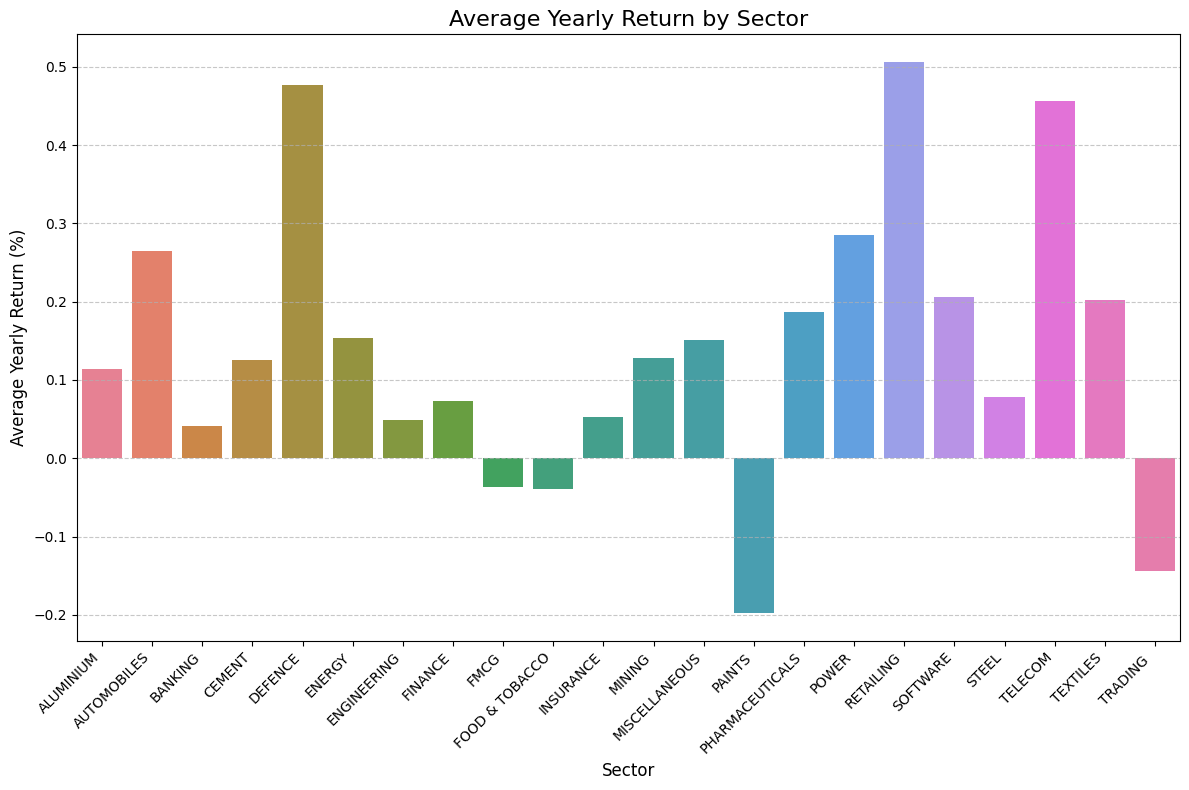

In [ ]:
sector_avg_df = Sec_merged_df.groupby("Sector")["yearly_return"].mean().reset_index()
# sector_avg_df.to_csv('sector_avg_yearly_return.csv',index=True)

plt.figure(figsize=(12, 8))
sns.barplot(data=sector_avg_df, x="Sector", y="yearly_return", hue="Sector")

plt.title('Average Yearly Return by Sector', fontsize=16)
plt.xlabel('Sector', fontsize=12)
plt.ylabel('Average Yearly Return (%)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# plt.savefig('sector_performance.png')
plt.show()

**Stock Price Correlation**

**Stock Price Correlation Heatmap**

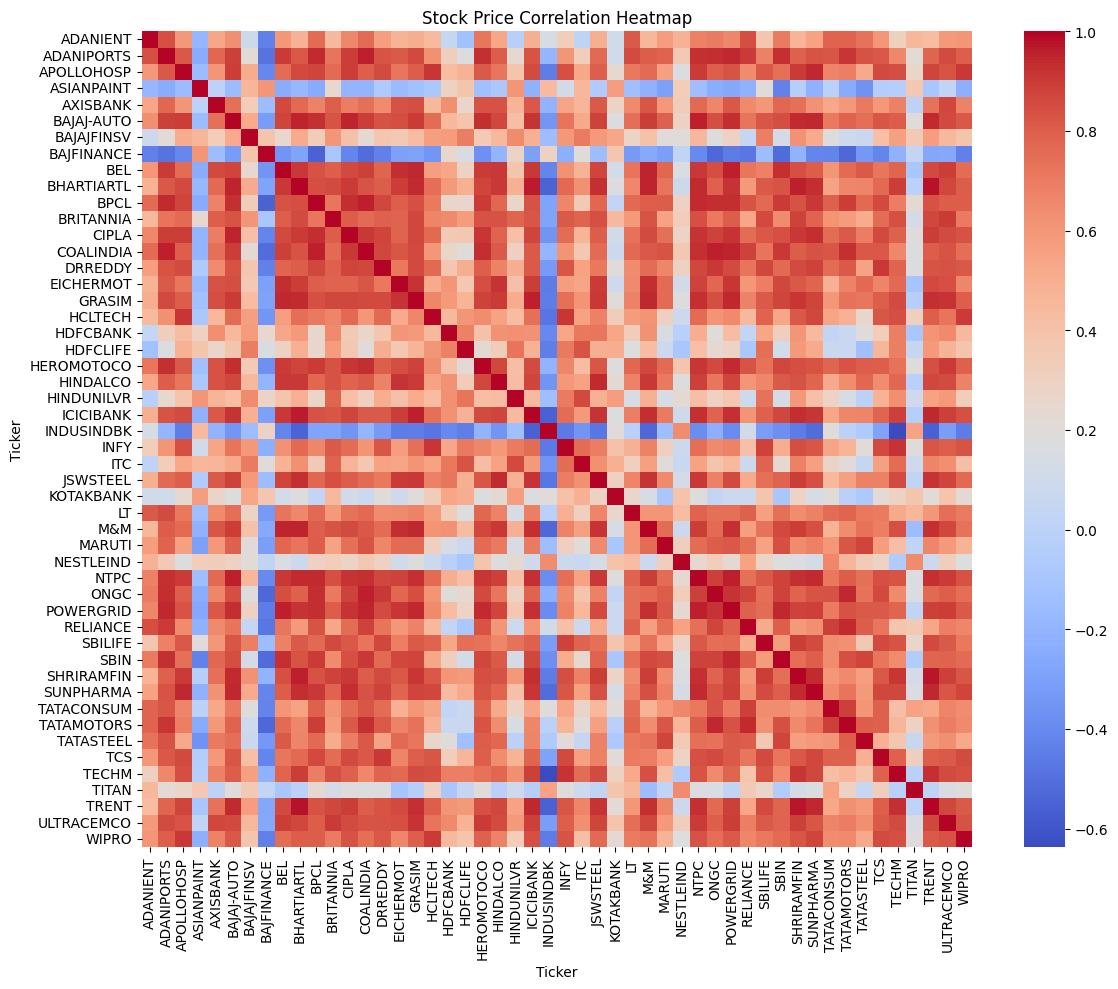

In [ ]:
stock_prices = merged_df.pivot(index='date', columns='Ticker', values='close')
correlation_matrix = stock_prices.corr()
# correlation_matrix.to_csv('correlation_matrix.csv',index=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Stock Price Correlation Heatmap')
plt.tight_layout() 
plt.show()

**Top 5 Gainers and Losers (Month-wise)**

Month: 2023-10


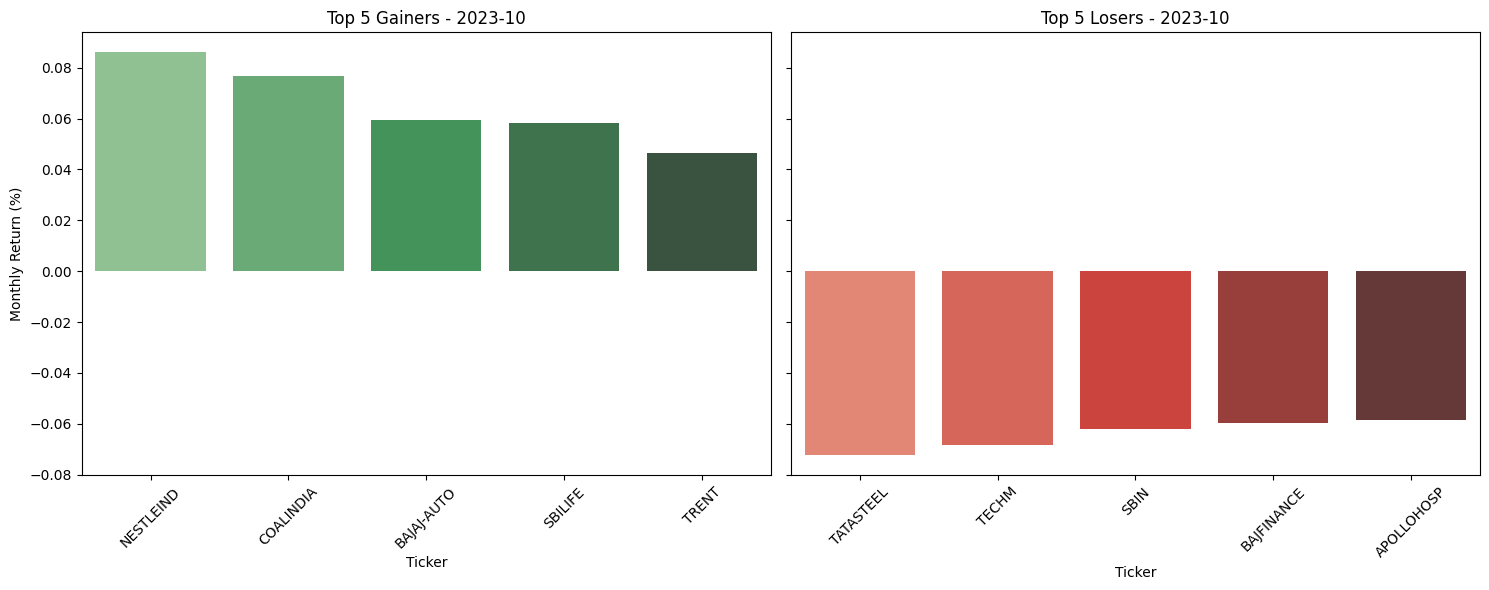

Month: 2023-11


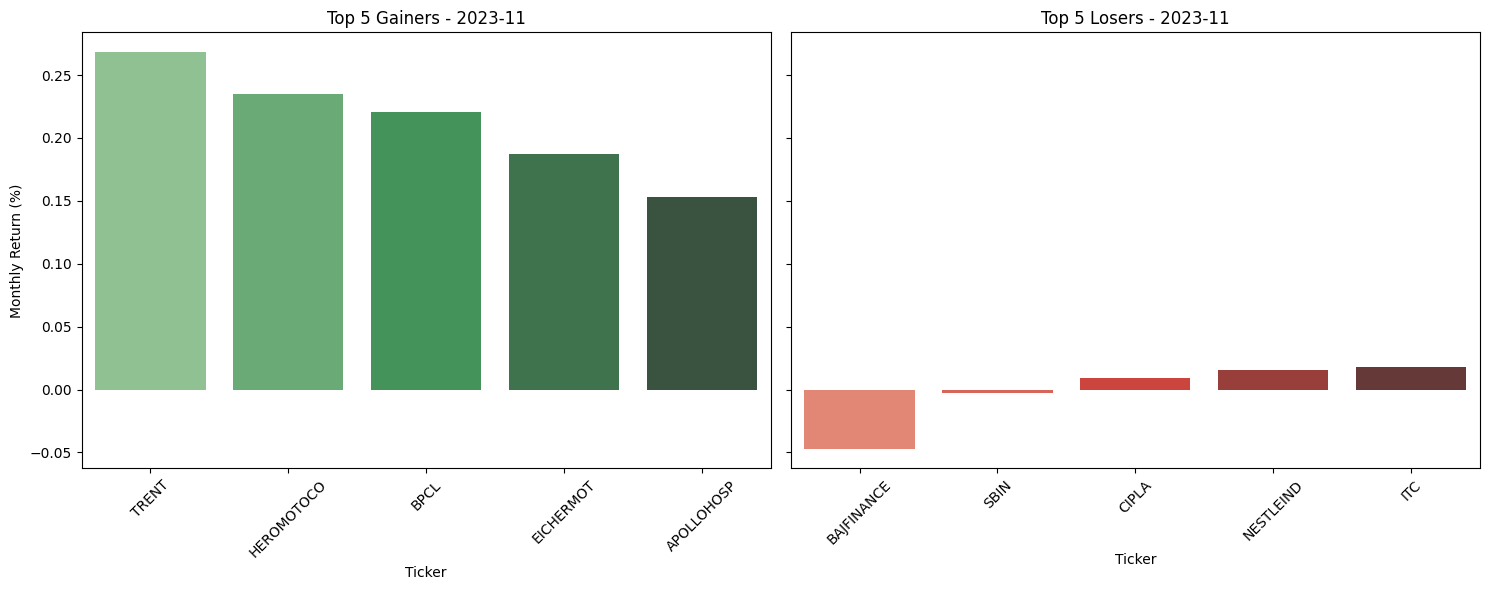

Month: 2023-12


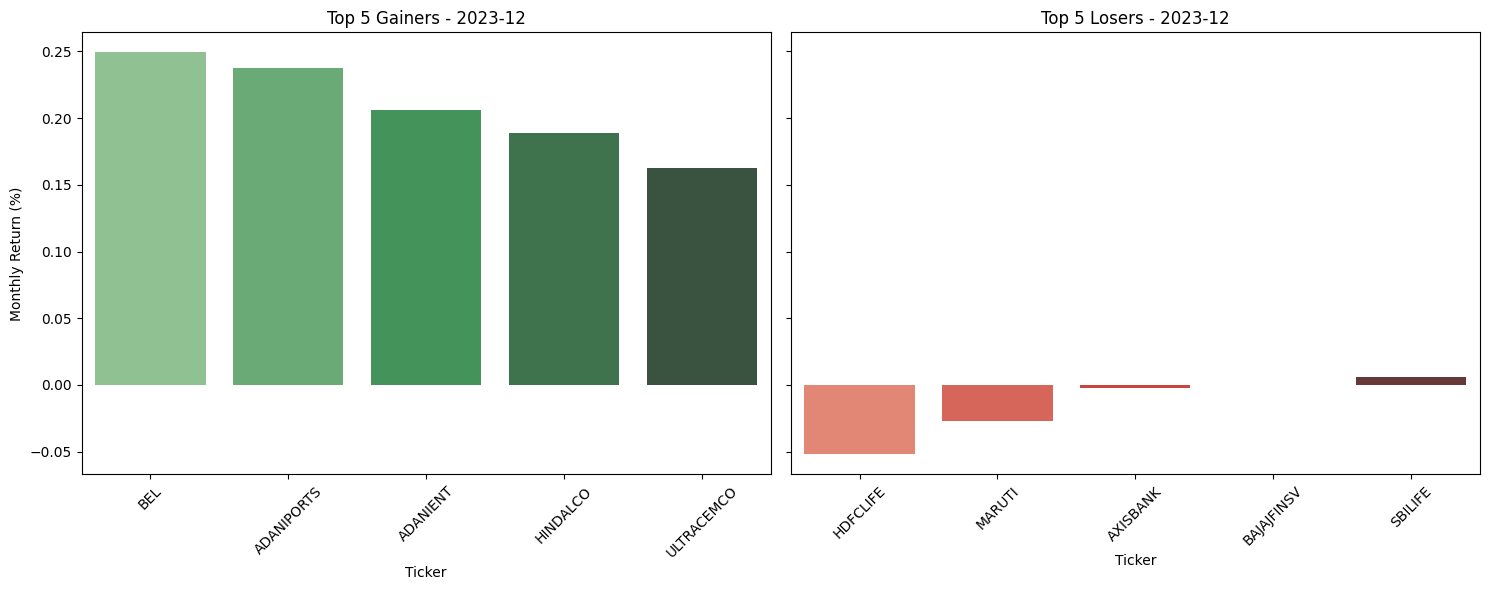

Month: 2024-01


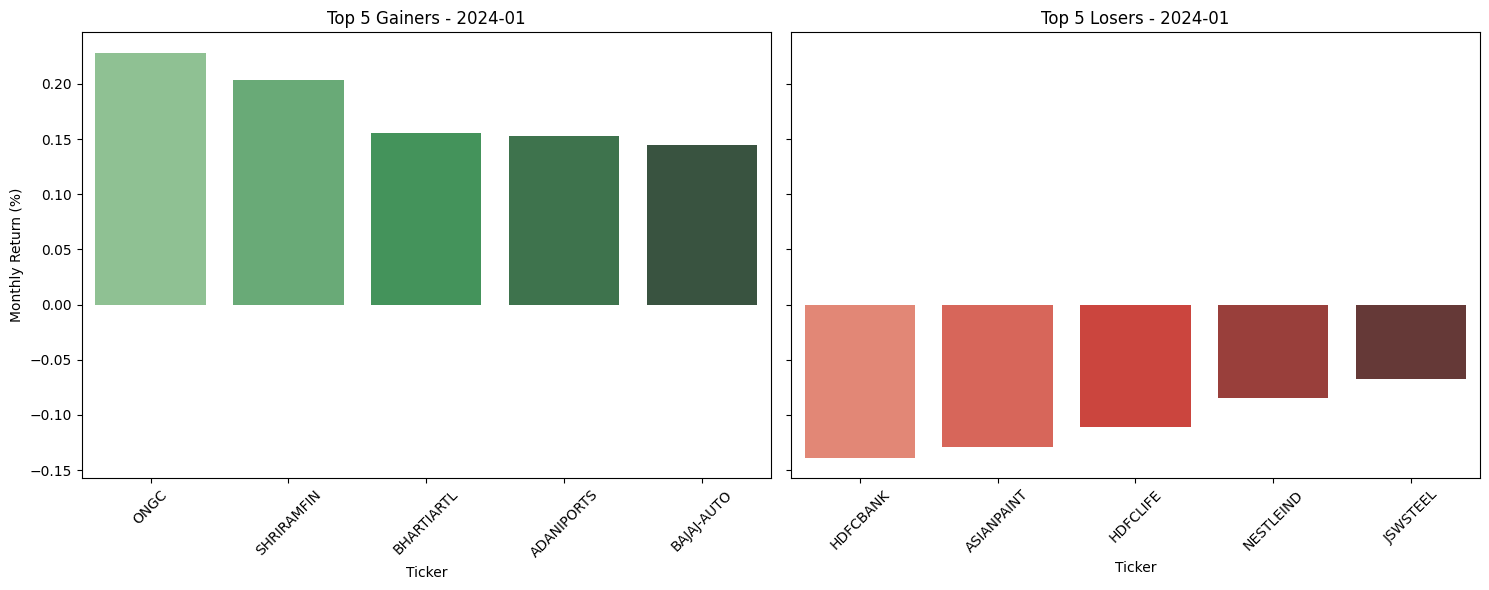

Month: 2024-02


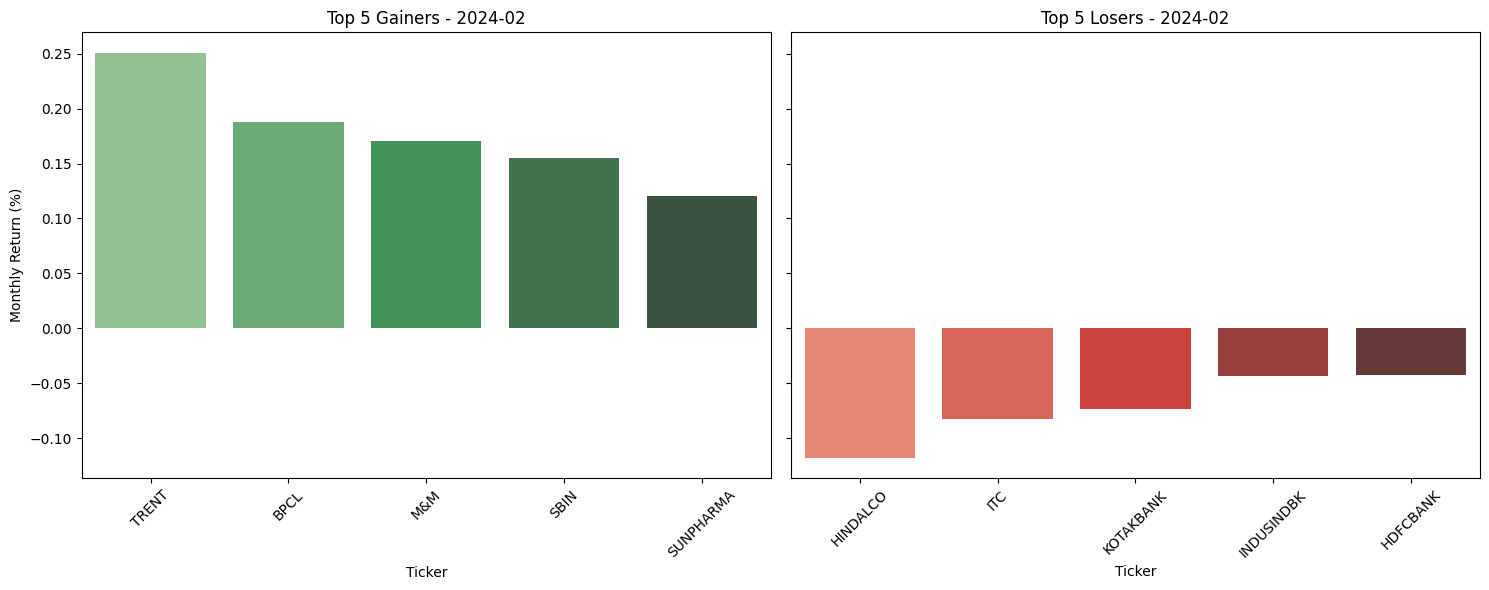

Month: 2024-03


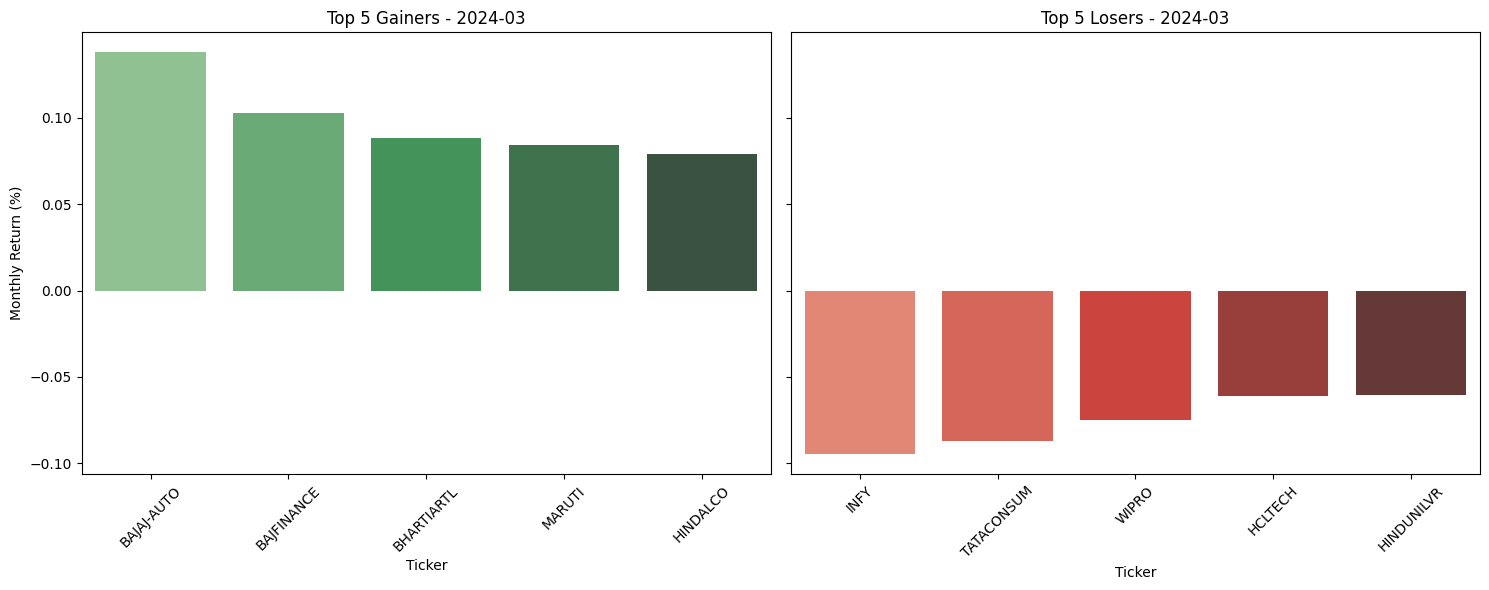

Month: 2024-04


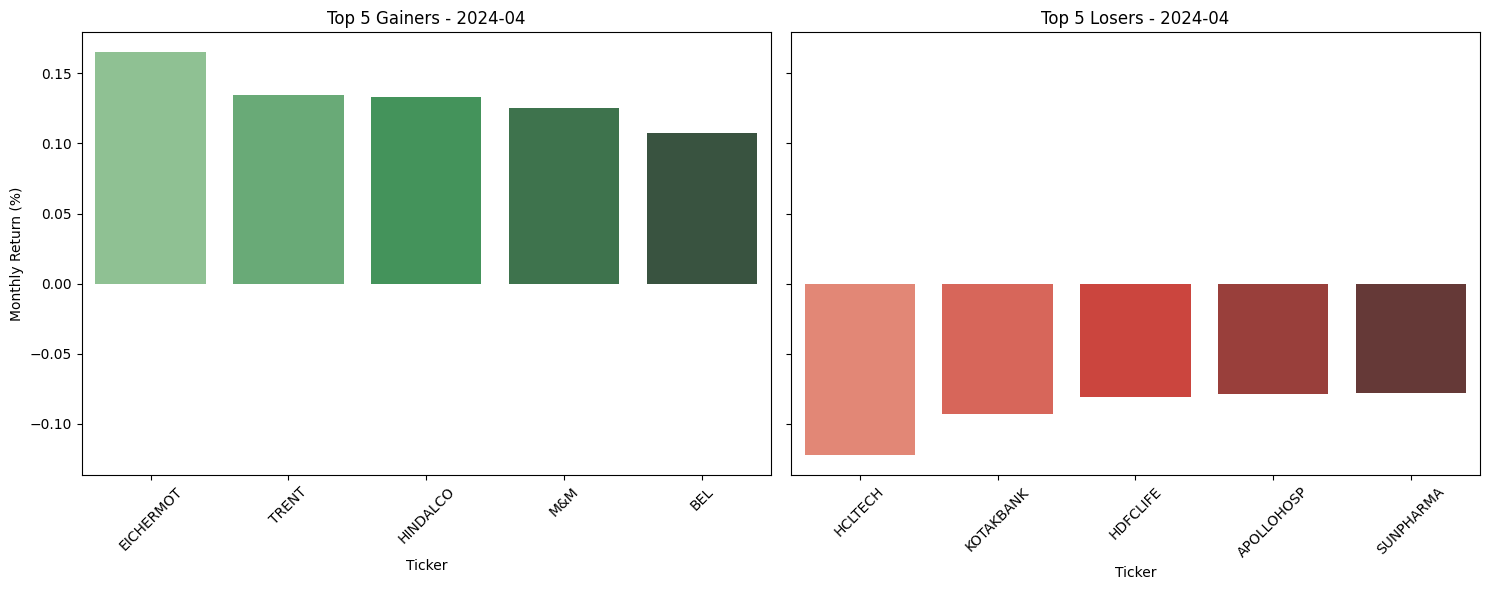

Month: 2024-05


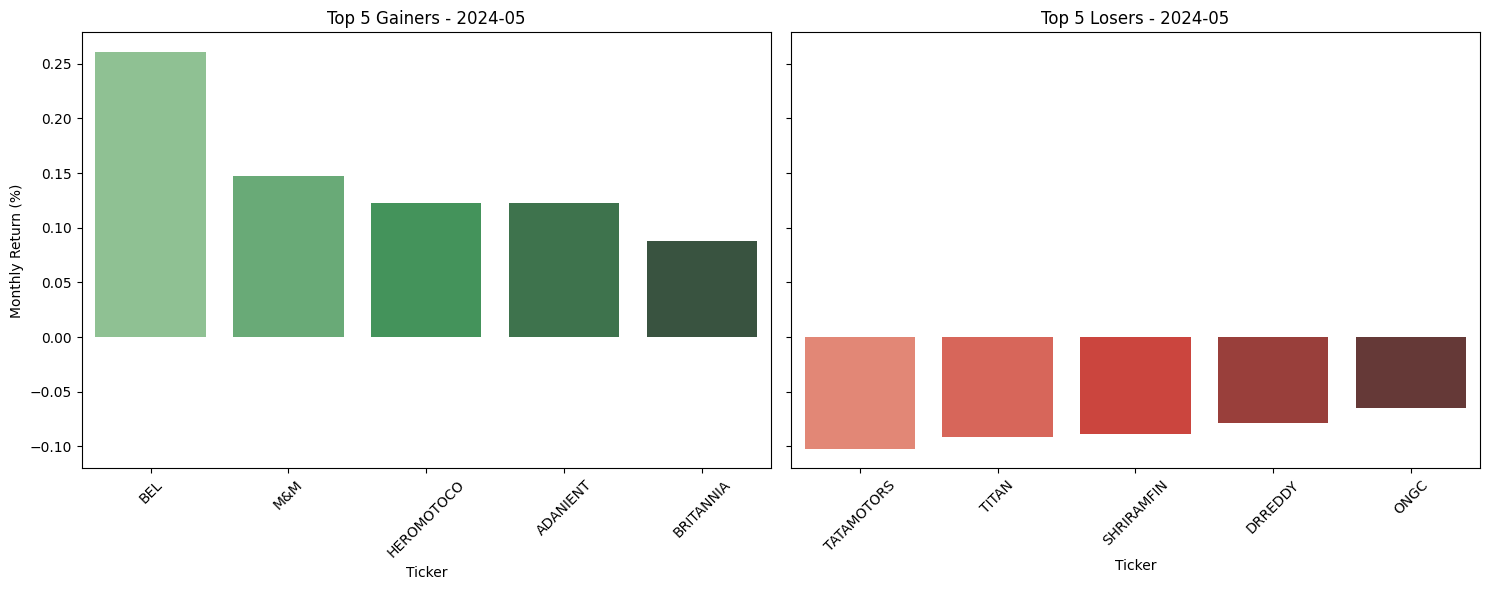

Month: 2024-06


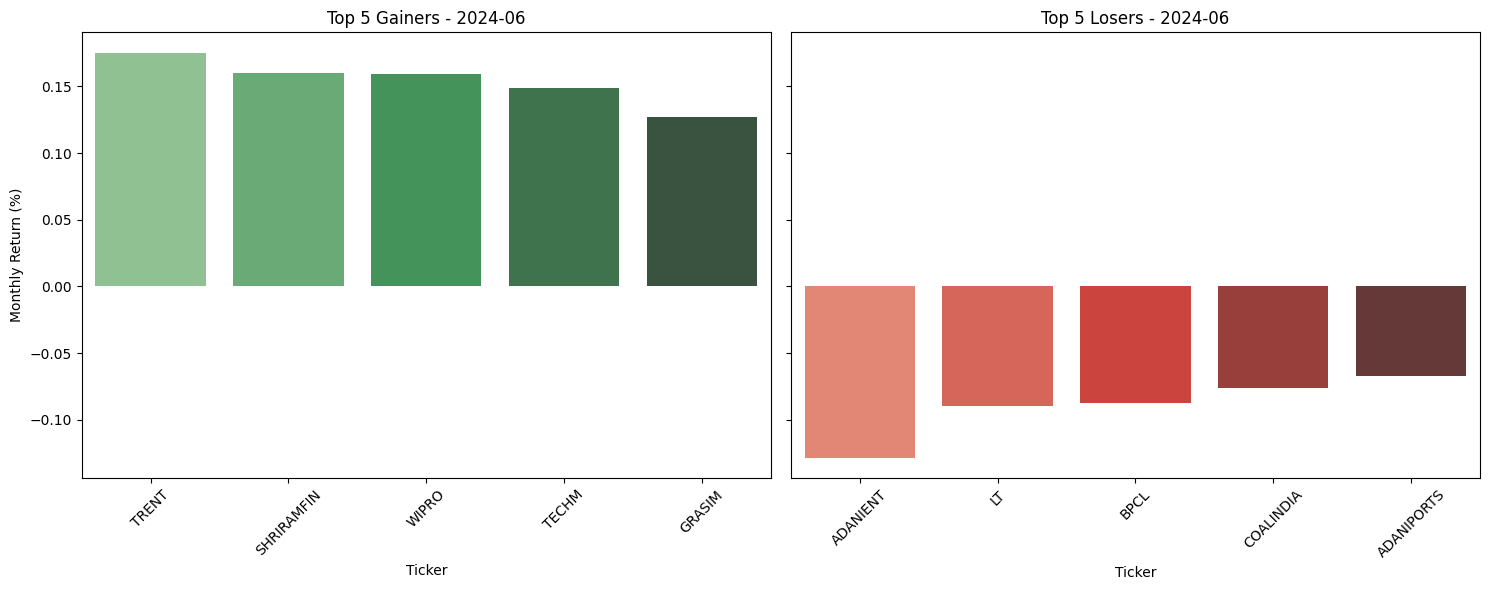

Month: 2024-07


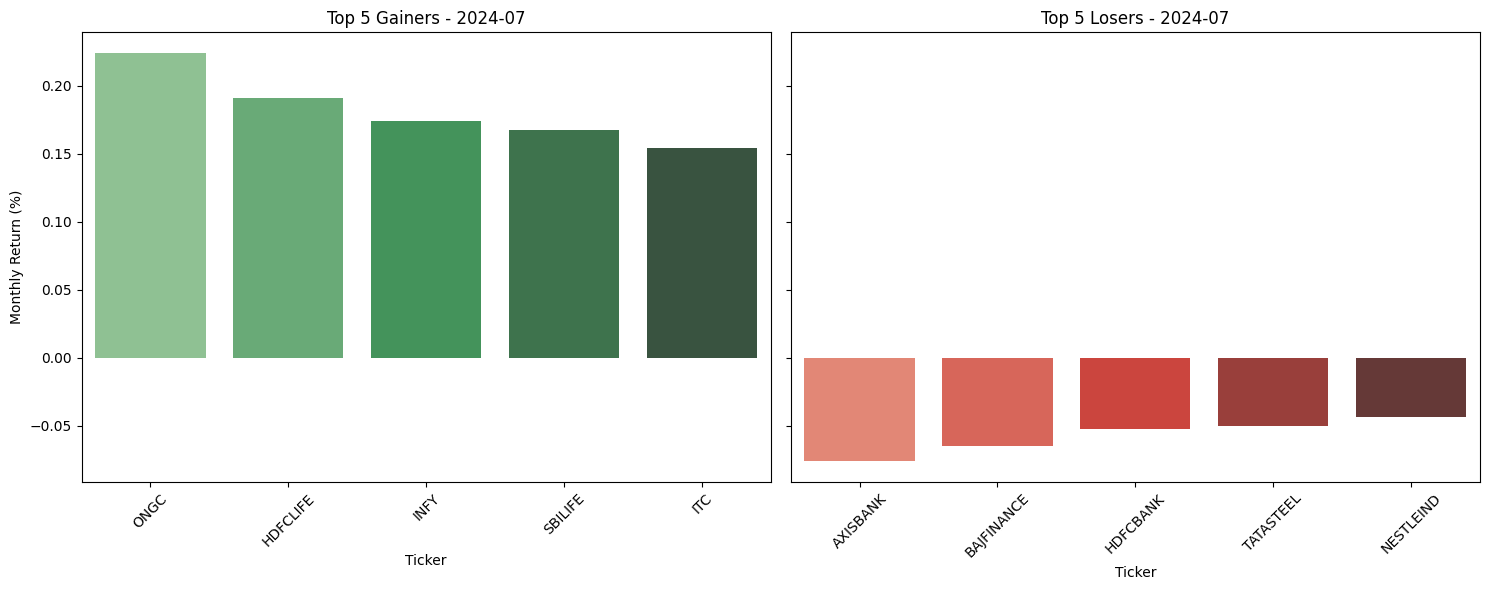

Month: 2024-08


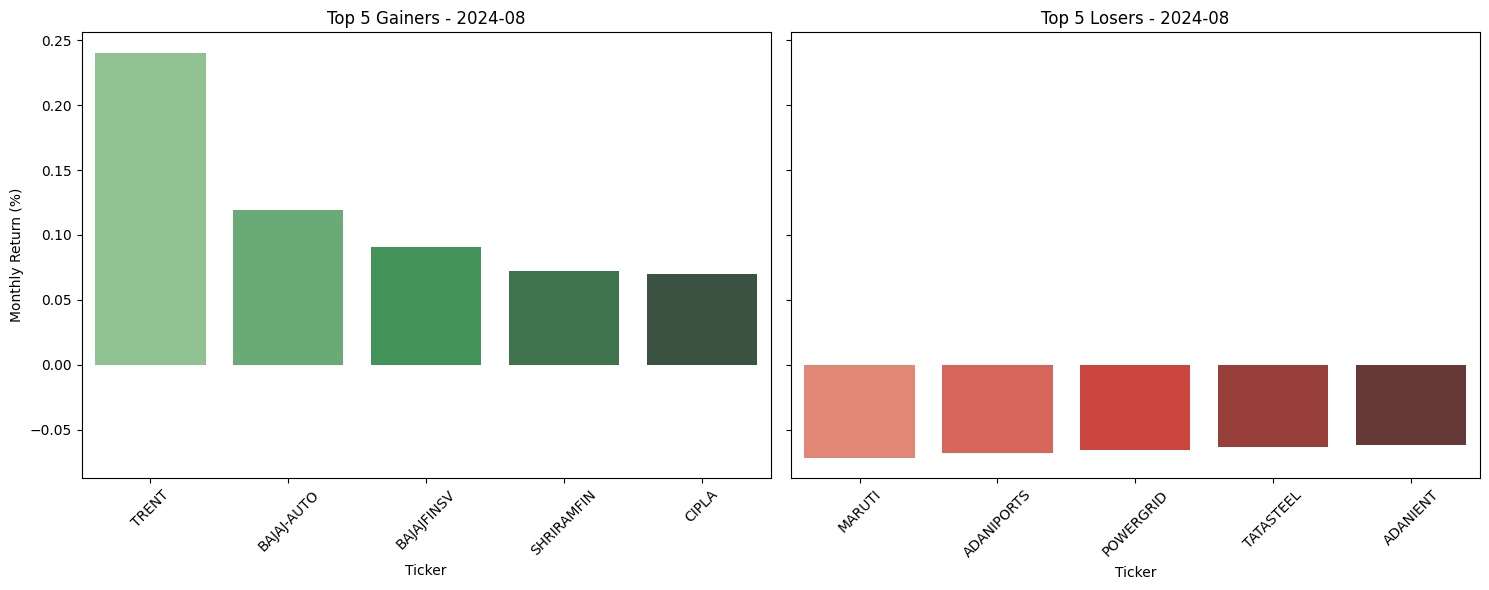

Month: 2024-09


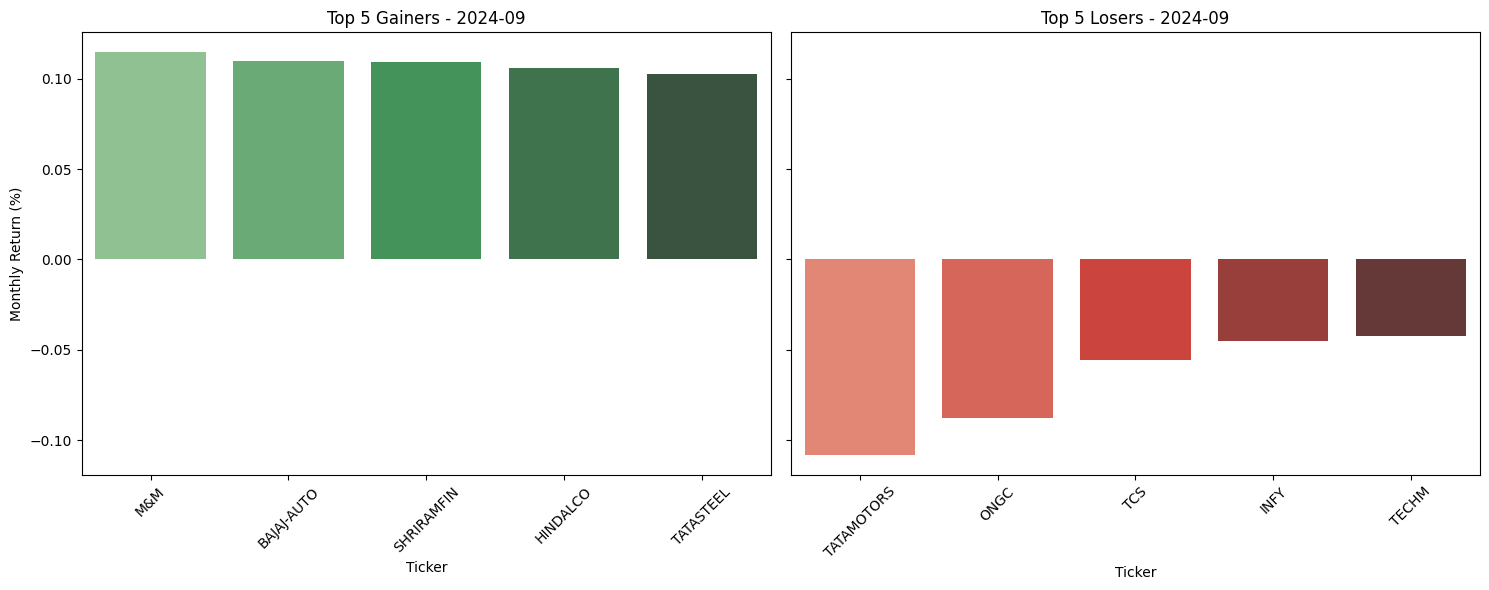

Month: 2024-10


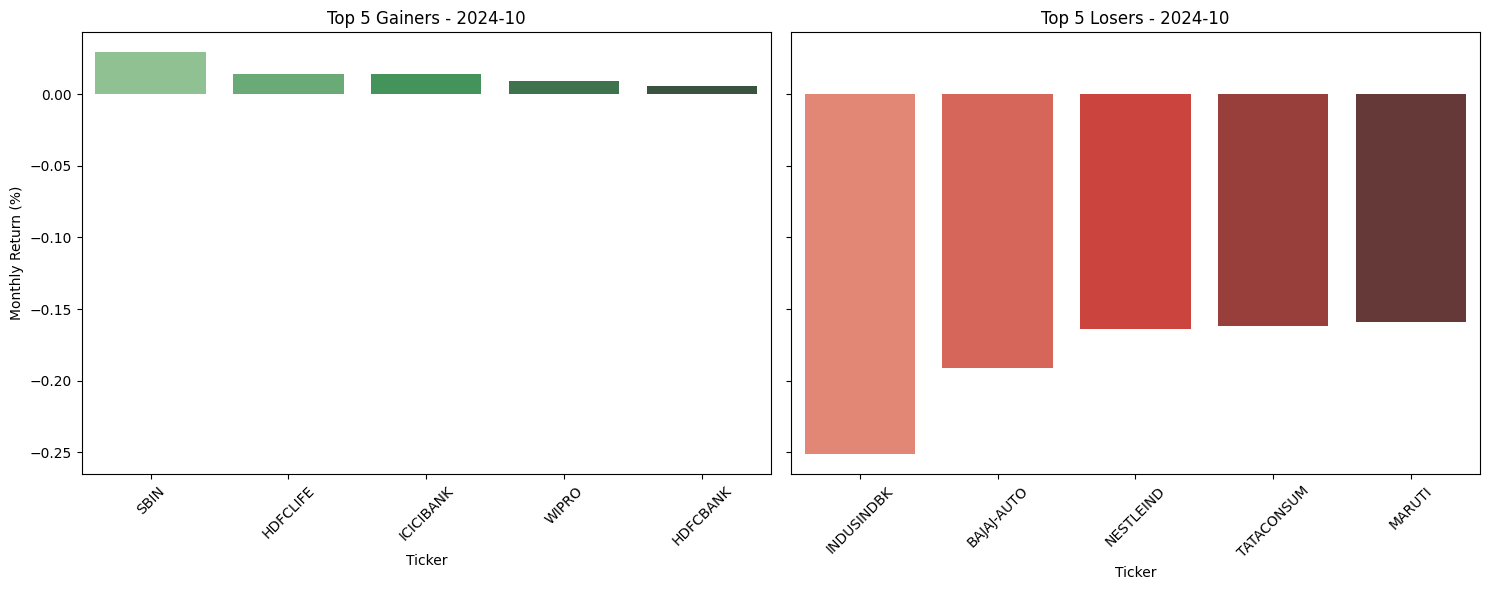

Month: 2024-11


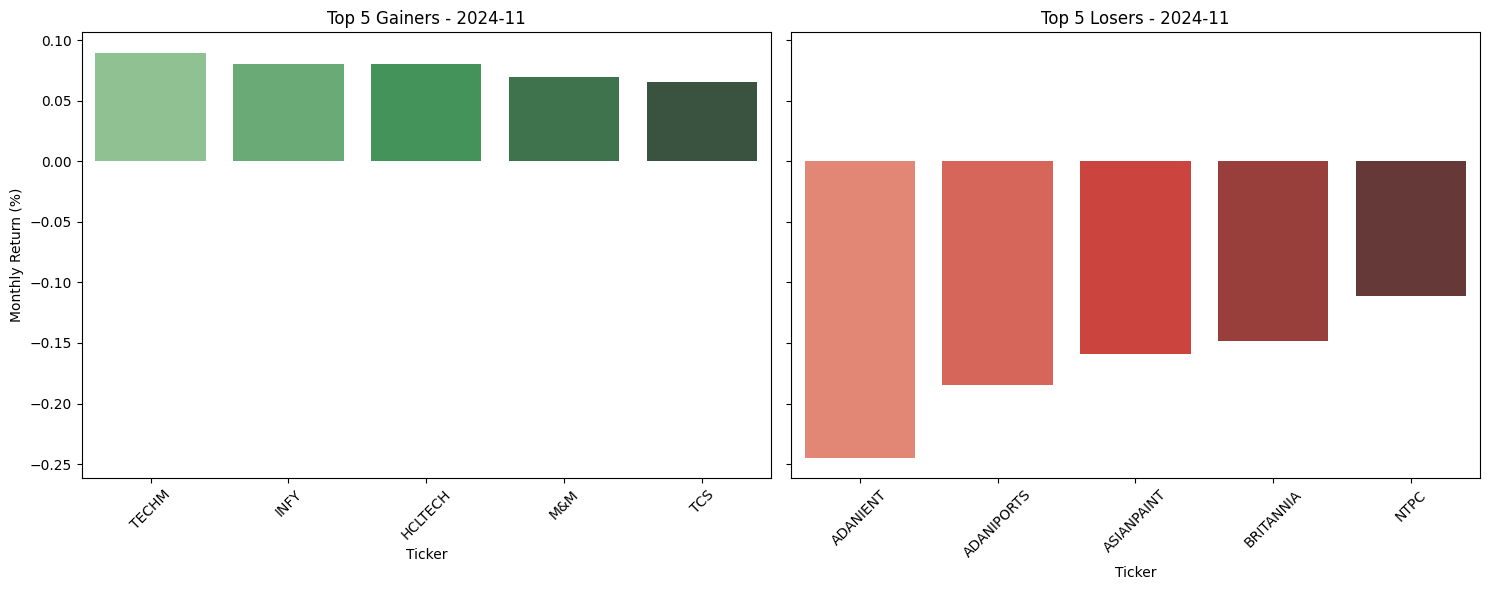

In [ ]:
for month in merged_df['month'].unique():
    month_data = merged_df[merged_df['month'] == month]

    month_data_unique = month_data.drop_duplicates(subset=['Ticker'])

    print(f"Month: {month}")
    
    if len(month_data_unique) >= 5:
        top_5_gainers = month_data_unique.nlargest(5, 'monthly_return')
        top_5_losers = month_data_unique.nsmallest(5, 'monthly_return')
        
        top_5_gainers['Category'] = 'Top 5 Gainers'
        top_5_losers['Category'] = 'Top 5 Losers'
    
        fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
        
        sns.barplot(x='Ticker', y='monthly_return', data=top_5_gainers, ax=axes[0], palette='Greens_d', hue='Ticker')
        axes[0].set_title(f'Top 5 Gainers - {month}')
        axes[0].set_xlabel('Ticker')
        axes[0].set_ylabel('Monthly Return (%)')
        axes[0].tick_params(axis='x', rotation=45)

        sns.barplot(x='Ticker', y='monthly_return', data=top_5_losers, ax=axes[1], palette='Reds_d', hue='Ticker')
        axes[1].set_title(f'Top 5 Losers - {month}')
        axes[1].set_xlabel('Ticker')
        axes[1].tick_params(axis='x', rotation=45)

        plt.tight_layout()
        plt.show()

In [113]:
from sqlalchemy import create_engine

username = 'root'
password = 'abcd'
host = 'localhost'
port = '3306'
database = 'STOCKMARKET'

connection_string = f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}'

engine = create_engine(connection_string)

merged_df.to_sql('tblStockMarket', con=engine, if_exists='append', index=False)
Sec_merged_df.to_sql('tblSectorStocks', con=engine, if_exists='append', index=False)

C:\Users\Lathiga Magasri\AppData\Local\Temp\ipykernel_32764\4281166537.py:13: UserWarning: The provided table name 'tblStockMarket' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  merged_df.to_sql('tblStockMarket', con=engine, if_exists='append', index=False)
C:\Users\Lathiga Magasri\AppData\Local\Temp\ipykernel_32764\4281166537.py:14: UserWarning: The provided table name 'tblSectorStocks' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  Sec_merged_df.to_sql('tblSectorStocks', con=engine, if_exists='append', index=False)


14200